In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

### Importing data

In [2]:
# Data exported as csv from a google spreadsheet
df = pd.read_csv('data/april7-2020.csv')

# Show 1st record
# df.info()

df.shape

(176, 21)

##  Cleaning dataset
- Results by Region
- Results by Country

In [3]:
print('Null records: {}'.format(len(df[df['Region '].isnull()])))

Null records: 3


In [4]:
# Data cleaning: Region

df = df[df['Region '].notna()]
df['Region '].unique()

array(['ECA', 'MENA', 'North America', 'Asia', 'US', 'Africa', 'CSA',
       'CSA ', 'Africa ', 'Asia '], dtype=object)

In [5]:
# Clean Region column
df['Region '].replace({'US':'North America'}, inplace=True)
df['Region '].replace({'CSA ':'CSA'}, inplace=True)
df['Region '].replace({'Asia ':'Asia'}, inplace=True)
df['Region '].replace({'Africa ':'Africa'}, inplace=True)
df['Region '].unique()

array(['ECA', 'MENA', 'North America', 'Asia', 'Africa', 'CSA'],
      dtype=object)

In [6]:
df['Country'].unique()

array(['Turkey', 'Russia ', 'Israel', 'US', 'South Korea', 'South Korea ',
       nan, 'Singapore ', 'Taiwan', 'India ', 'Austria', 'Italy', 'Kenya',
       'South Africa', 'Bolivia', 'Brazil', 'Poland', 'Spain',
       'US (Israeli company)', 'Serbia', 'Ecuador', 'UK', 'Slovenia',
       'Ukraine ', 'Azerbaijan', 'Hungary', 'Armenia', 'Croatia',
       'North Macedonia', 'Bulgaria', 'Bosnia', 'Moldova', 'Kosovo',
       'U.S. ', 'Canada', 'US ', 'Venezuela', 'Argentina', 'Venezuela ',
       'Peru', 'Dominican Republic', 'Dominican Republic ', 'Honduras',
       'El Salvador', 'El Salvador ', 'Cuba', 'Nigeria', 'Niger', 'DRC',
       'Tanzania', 'Nigeria ', 'Ethiopia', 'Kenya ', 'Zimbabwe', 'Zambia',
       'Cameroon', 'Liberia ', 'Uganda', "Cote d'Ivoire ", 'Iran',
       'Iran ', 'Egypt', 'Jordan', 'China ', 'Philippines ', 'Malaysia',
       'India', 'Thailand', 'Bangladesh ', 'Liberia',
       'Russian Federation'], dtype=object)

In [7]:
# Data cleaning: countries
df[df['Country'].isnull()]

,Region,Country,"City, Region",Description,Date (M.DD.Y),Link,Mention or use of false news measure (Y/N),Detained (Y/N),Arrested (Y/N),Imprisoned (Y/N),...,Chilling Statement (Y/N),Attacked (Y/N),Charged (Y/N),Online Harassment (Y/N),Threatened (Y/N),Death (Y/N),Surveillance,Criminalization: type of new or amended law (please specify),Disinformation or propaganda (Y/N),Censorship
11,North America,NaN,NaN,Facebook sharing disease migration maps to hel...,NaN,https://www.wsj.com/articles/to-track-virus-go...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,mapping,NaN,NaN,NaN


In [8]:
df.iloc[11][1] = 'US'
df.iloc[11]

Region                                                                                              North America
Country                                                                                                        US
City, Region                                                                                                  NaN
Description                                                     Facebook sharing disease migration maps to hel...
Date (M.DD.Y)                                                                                                 NaN
Link                                                            https://www.wsj.com/articles/to-track-virus-go...
Mention or use of false news measure (Y/N)                                                                    NaN
Detained (Y/N)                                                                                                NaN
Arrested (Y/N)                                                                          

In [9]:
# Cleaning countries column
df['Country'] = df['Country'].str.strip()

df['Country'].replace({'U.S.':'US'}, inplace=True)
df['Country'].replace({'US (Israeli company)':'US'}, inplace=True)
df['Country'].replace({'Russian Federation':'Russia'}, inplace=True)

list_countries = df['Country'].sort_values().unique()

print(len(list_countries))
print(df['Country'].sort_values().unique())

57
['Argentina' 'Armenia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Bolivia'
 'Bosnia' 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'China' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'DRC' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Ethiopia' 'Honduras' 'Hungary' 'India' 'Iran' 'Israel'
 'Italy' 'Jordan' 'Kenya' 'Kosovo' 'Liberia' 'Malaysia' 'Moldova' 'Niger'
 'Nigeria' 'North Macedonia' 'Peru' 'Philippines' 'Poland' 'Russia'
 'Serbia' 'Singapore' 'Slovenia' 'South Africa' 'South Korea' 'Spain'
 'Taiwan' 'Tanzania' 'Thailand' 'Turkey' 'UK' 'US' 'Uganda' 'Ukraine'
 'Venezuela' 'Zambia' 'Zimbabwe']


### Cleaned data summary: Region

173 valid records. Distribution by region:


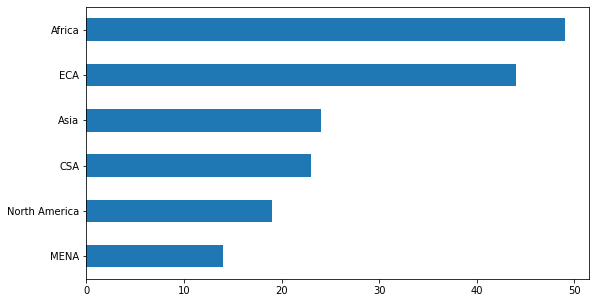

In [10]:
# Number of entries by region
df['Region '] = df['Region '].str.strip()
df['Region '].value_counts().sort_values().plot(kind='barh', figsize=(9,5))
print('{} valid records. Distribution by region:'.format(df['Region '].count()))

### Cleaned data summary: Countries

List of 9 countries out of 57 with more than 5 record in the database


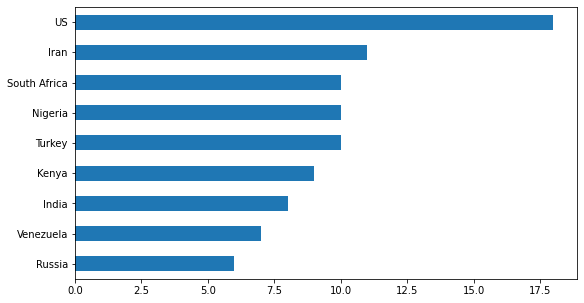

In [11]:
# Number of entries by country
countries = df['Country'].value_counts().sort_values(ascending = False)

i = 5

top_countries = countries[countries > i].sort_values()

top_countries.plot(kind='barh', figsize=(9,5))
print('List of {} countries out of {} with more than {} record in the database'.format(len(top_countries), len(list_countries), i))

### Columns formatting

In [12]:
# Rename columns
df.rename(columns={"Date (M.DD.Y)": "date", 
                   "Mention or use of false news measure (Y/N)": "false_news",
                   "Detained (Y/N)": "detained",
                   "Arrested (Y/N) ": "arrested",
                   "Imprisoned (Y/N) ": "imprisoned",
                   "Access Denied (Y/N)": "access_denied",
                   "Chilling Statement (Y/N)": "chilling_statement",
                   "Attacked (Y/N)": "attacked",
                   "Charged (Y/N) ": "charged",
                   "Online Harassment (Y/N)": "online_harassment",
                   "Threatened (Y/N)": "threatened",
                   "Death (Y/N)": "death",
                   "Criminalization: type of new or amended law (please specify)": "criminalization",
                   "Disinformation or propaganda (Y/N)": "disinformation_propaganda"}, inplace=True)

In [13]:
# List of columns to boolean
columns_to_boolean = ['false_news', 
                      'detained', 
                      'arrested', 
                      'imprisoned', 
                      'access_denied',
                      'chilling_statement',
                      'attacked',
                      'charged',
                      'online_harassment',
                      'threatened',
                      'death',
                      'Surveillance',
                      'disinformation_propaganda']

In [14]:
# Make columns boolean: 1/0
for i in columns_to_boolean:
    df[i] = df[i].apply(lambda x: 1 if x =='Y' else 0).astype('int32')

In [15]:
# PENDING: dates formatting
# df.date.unique()

### Sumary: additional classification

Number of records with additional classification:


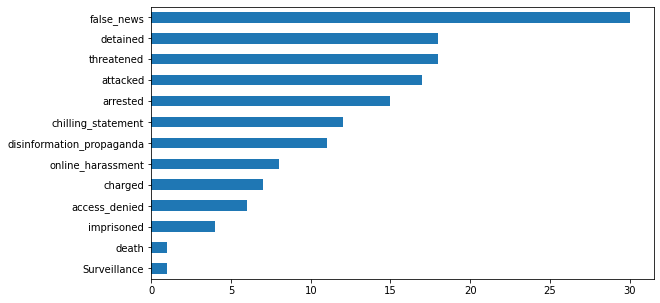

In [16]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
print("Number of records with additional classification:")
tags[1].sort_values(ascending = False)
tags[1].sort_values(ascending = False).sort_values().plot(kind='barh', figsize=(9,5))

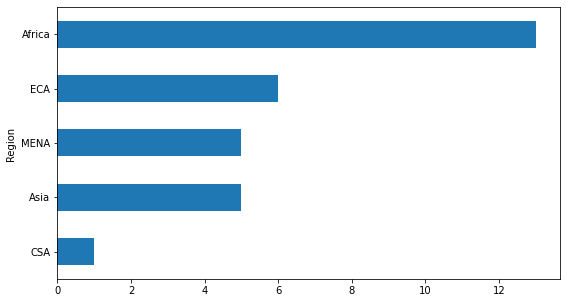

In [17]:
regions_false_news = df.loc[df['false_news'] == 1]

regions_false_news.groupby(['Region '])['false_news'].count().sort_values().plot(kind='barh', figsize=(9,5))

## Functions
- Filter by one or two columns, print summary data & table
- Calculate all combinations of boolean variables

In [18]:
# Filter data by one column
def filter_by_column(data, col):
    table = data.loc[data[col] == 1]
    
#     pd.set_option('display.max_colwidth', -1)
    
    print('\nThere are {} records classified as {}:\n'.format(len(table), col))
    print(table[['Country', 'Link']])
    
    print('\nDistribution by region')
    table['Region '].value_counts().plot(kind='barh', figsize=(9,5))
    

In [19]:
# Filter data by two columns
def filter_by_two_columns(data, col1, col2):
    table = data.loc[(data[col1] == 1) & (data[col2] == 1)]
    try:
        print('\nThere are {} records classified as {} and {}:\n'.format(len(table), col1, col2))
        print(table[['Country', 'Link']])  
#         print('\nDistribution by country')
#         table['Country'].value_counts().plot(kind='barh', figsize=(10,5))
    
    except IndexError:
        print('No results')
        pass


### Summary: disinformation_propaganda


There are 11 records classified as disinformation_propaganda:

     Country                                               Link
31   Ukraine  https://www.buzzfeednews.com/article/christoph...
32    Russia  https://www.theguardian.com/world/2020/mar/18/...
47    Serbia  https://balkaninsight.com/2020/04/02/serbian-r...
73        US  https://www.nytimes.com/2020/03/28/us/testing-...
75        US  https://www.journalism.org/2020/03/18/american...
97   Nigeria  https://www.legit.ng/1298893-coronavirus-court...
134   Uganda  https://www.pmldaily.com/news/2020/03/pastor-y...
135   Uganda  https://www.pmldaily.com/news/2020/03/breaking...
155    China  https://www.propublica.org/article/how-china-b...
158   Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...
172  Liberia  https://frontpageafricaonline.com/news/liberia...

Distribution by region


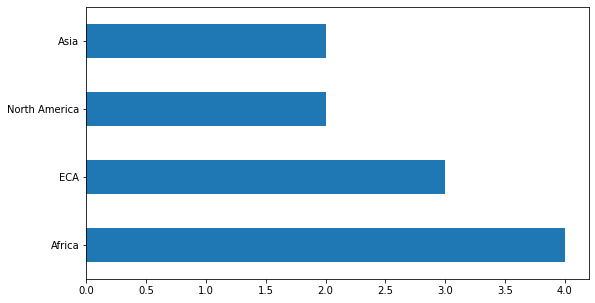

In [20]:
filter_by_column(df, 'disinformation_propaganda')


There are 12 records classified as chilling_statement:

       Country                                               Link
41      Turkey  https://www.haaretz.com/middle-east-news/turke...
48      Serbia  https://balkaninsight.com/2020/04/01/serbian-g...
49          UK  https://www.theguardian.com/society/2020/mar/3...
55    Bulgaria                 http://new.aej-bulgaria.org/27-03/
64          US  https://www.reuters.com/article/us-health-coro...
71          US  https://twitter.com/SenatorBurr/status/1240766...
76   Venezuela  https://twitter.com/MilagrosSocorro/status/123...
146       Iran                                               Link
147       Iran                                                NaN
163      India  https://www.siasat.com/journalist-unions-lodge...
164      India  https://twitter.com/writetohussain/status/1242...
167      India  https://www.rediff.com/news/report/tv-journali...

Distribution by region


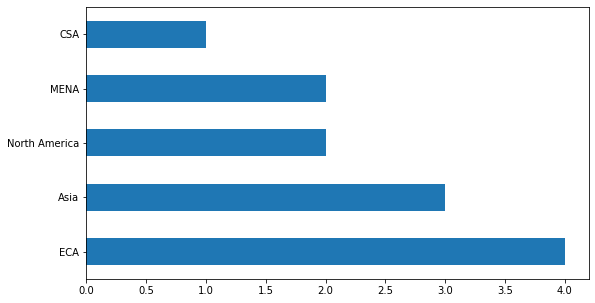

In [21]:
filter_by_column(df, 'chilling_statement')

In [22]:
# Filter data by two columns
filter_by_two_columns(df, 'disinformation_propaganda', 'chilling_statement')


There are 0 records classified as disinformation_propaganda and chilling_statement:

Empty DataFrame
Columns: [Country, Link]
Index: []


## Clustering
- Not enough data/annotation to aggregate by clusters at this point

In [29]:
# from itertools import combinations

# columns with boolean values
d = df.iloc[:,6:18]

# col_names = d.columns
# combs = list(combinations(col_names,2))
# len(combs)

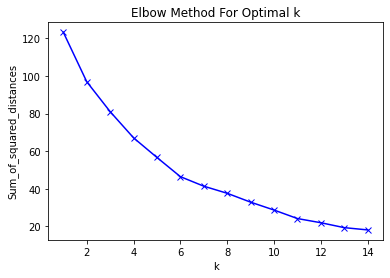

In [30]:
# Determining the number of clusters in the dataset
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()